# Experimenting with DataBlock API

This is the core API in fastai where work with data.
So, mastering this is pretty crucial.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## MNIST example

In [45]:
path = untar_data(URLs.MNIST_TINY); path.ls()

[PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train')]

In [46]:
!tree {path} -L 2

/home/arunoda_susiripala/.fastai/data/mnist_tiny
├── labels.csv
├── models
│   └── tmp.pth
├── test
│   ├── 1503.png
│   ├── 1605.png
│   ├── 1883.png
│   ├── 2032.png
│   ├── 205.png
│   ├── 2642.png
│   ├── 3515.png
│   ├── 3848.png
│   ├── 3878.png
│   ├── 4605.png
│   ├── 4654.png
│   ├── 500.png
│   ├── 5071.png
│   ├── 585.png
│   ├── 5988.png
│   ├── 617.png
│   ├── 6335.png
│   ├── 6501.png
│   ├── 6517.png
│   └── 6736.png
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

8 directories, 22 files


As you can see, this dataset is grouped everything into directories.<br/>
Even lables are in an it's own sub directories.<br/>
Let's try to load this dataset.

In [47]:
# load images
data = ImageItemList.from_folder(path)
# split images into training and validation
data = data.split_by_folder('train', 'valid')
# get lables for images based on folders
data = data.label_from_folder()
# add the test dataset
data = data.add_test_folder('test')
# transform them
data = data.transform(get_transforms(do_flip=False), size=64)
# get the databunch
db = data.databunch()

In [48]:
db

ImageDataBunch;
Train: LabelList
y: CategoryList (709 items)
['3' '3' '3' '3' ... '7' '7' '7' '7']
Path: .
x: ImageItemList (709 items)
[PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/3/7721.png')
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/3/7778.png')
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/3/8077.png')
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/3/7966.png') ...
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/7/7686.png')
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/7/8090.png')
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/7/908.png')
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train/7/8717.png')]
Path: /home/arunoda_susiripala/.fastai/data/mnist_tiny;
Valid: LabelList
y: CategoryList (699 items)
['3' '3' '3' '3' ... '7' '7' '7' '7']
Path: .
x: ImageItemList (699 items)
[PosixPath('/home/arunoda_susiripala/.fastai

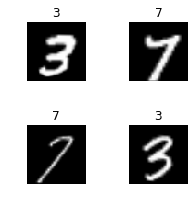

In [49]:
## Show some sample images from the training set.
db.show_batch(2, figsize=(3,3))

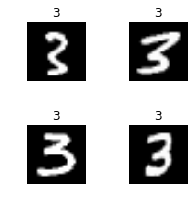

In [50]:
db.show_batch(2, figsize=(3,3), ds_type=DatasetType.Valid)

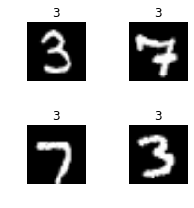

In [51]:
db.show_batch(2, figsize=(3,3), ds_type=DatasetType.Test)

## Planet Dataset

This is the kaggle planet dataset.

In [4]:
planet = untar_data(URLs.PLANET_SAMPLE); planet.ls()

[PosixPath('/home/arunoda_susiripala/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/planet_sample/train')]

In [6]:
!tree {planet} | head

/home/arunoda_susiripala/.fastai/data/planet_sample
├── labels.csv
└── train
    ├── train_10001.jpg
    ├── train_10007.jpg
    ├── train_10030.jpg
    ├── train_10033.jpg
    ├── train_1004.jpg
    ├── train_10042.jpg
    ├── train_10075.jpg


In [7]:
!head {planet.ls()[0]}

image_name,tags
train_21983,partly_cloudy primary
train_9516,clear cultivation primary water
train_12664,haze primary
train_36960,clear primary
train_5302,haze primary road
train_13350,clear primary
train_19547,agriculture clear primary road
train_31388,partly_cloudy primary
train_32079,partly_cloudy primary


Here we've all the images a directory called `planet` and also we've a CSV where we've both image names and lables (They call them as tags).

Let's load them.

In [27]:
## load data
d = ImageItemList.from_csv(planet, 'labels.csv', col=0, folder="train", suffix=".jpg")

## train / validation split
## since it's not given we can do a random split
d = d.random_split_by_pct(0.2)

## label them.
d = d.label_from_df(1, sep=" ")

## Transform it
d = d.transform(get_transforms(flip_vert=True), size=64)

## get the databunch
db = d.databunch()

In [28]:
db

ImageDataBunch;
Train: LabelList
y: MultiCategoryList (800 items)
[list(['partly_cloudy', 'primary']) list(['clear', 'cultivation', 'primary', 'water']) list(['haze', 'primary'])
 list(['haze', 'primary', 'road']) ... list(['clear', 'primary', 'road', 'water']) list(['clear', 'primary'])
 list(['clear', 'primary', 'road']) list(['clear', 'primary'])]
Path: .
x: ImageItemList (800 items)
['/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_21983.jpg'
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_9516.jpg'
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_12664.jpg'
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_5302.jpg' ...
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_10311.jpg'
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_19080.jpg'
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_39339.jpg'
 '/home/arunoda_susiripala/.fastai/data/planet_sample/train/train_193

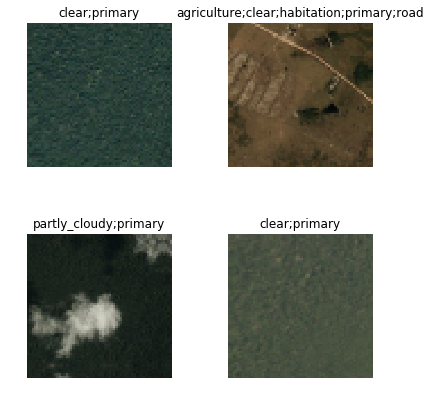

In [30]:
db.show_batch(2, figsize=(6, 6))

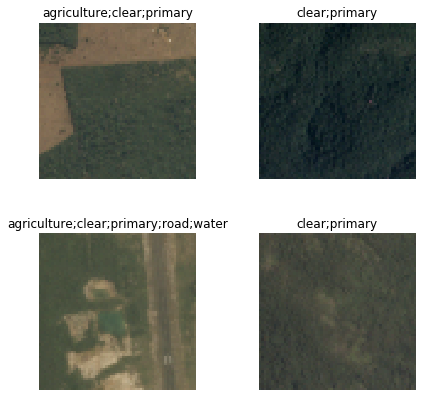

In [34]:
db.show_batch(2, figsize=(6, 6), ds_type=DatasetType.Valid)

In [63]:
db.train_ds[0]

(Image (3, 64, 64), MultiCategory partly_cloudy;primary)